In [117]:
import requests
import pandas as pd
import numpy as np
import json
import urllib.request
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 - Who is at risk?

## Dataset Description
- Race:  White, African-American, Asian, Hispanic
- Age: 18 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 64 years, 65 years and above
- Education: Less than high school, High school graduate, Some college, College Graduate
- Income(USD): Less than 15,000, 15,000 to 24,999, 25,000 to 34,999, 35,000 to 49,999, 50,000 and above
- Sex: male, female


In [118]:
#set up url and paramters
url = 'https://data.ca.gov/api/3/action/datastore_search'
params = {'resource_id': 'ca5e4758-98a4-4c7c-8b88-1699f010e35b',
          'limit': '147'}

In [119]:
#apply api to get data
fileobj = requests.get(url, params = {'resource_id': 'ca5e4758-98a4-4c7c-8b88-1699f010e35b',
          'limit': '147'})
res = fileobj.json()
result = res['result']
resres = result['records']
df = pd.DataFrame(resres)
df["Year"] = df["Year"].astype(float)
df["Percent"] = df["Percent"].astype(float)
df["Upper 95% CL"] = df["Upper 95% CL"].astype(float)
df["Lower 95% CL"] = df["Lower 95% CL"].astype(float)
df

,Upper 95% CL,Standard Error,Percent,Strata,Strata Name,Year,Lower 95% CL,_id,Geography
0,11.9,0.8,10.4,Total population,Total population,2018.0,8.9,1,California
1,9.9,0.8,8.4,Race-Ethnicity,White,2018.0,6.9,2,California
2,18.6,3.2,12.3,Race-Ethnicity,African-American,2018.0,6.0,3,California
3,13.9,2.7,8.5,Race-Ethnicity,Asian,2018.0,3.2,4,California
4,15.1,1.6,12.1,Race-Ethnicity,Hispanic,2018.0,9.0,5,California
...,...,...,...,...,...,...,...,...,...
142,14.1,1.1,11.9,Income,"$25,000 to $34,999",2012.0,9.8,143,California
143,11.0,0.8,9.5,Income,"$35,000 to $49,999",2012.0,7.9,144,California
144,7.0,0.4,6.3,Income,"$50,000 and above",2012.0,5.6,145,California
145,10.5,0.4,9.7,Sex,Male,2012.0,8.9,146,California


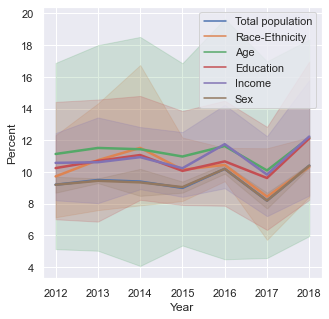

In [120]:
#a plot of all stratas and their confidence intervals
fig, ax = plt.subplots(1, 1)
sns.lineplot(x = "Year",y = "Percent",data =df, hue = "Strata", linewidth=2.5)
ax.legend(loc = 1)
plt.show()

Based on the plot above, we can observe that the age group has the highest range of percent 

In [164]:
#total
df_total = df.loc[df['Strata'] == 'Total population']
#df_total.head(5)

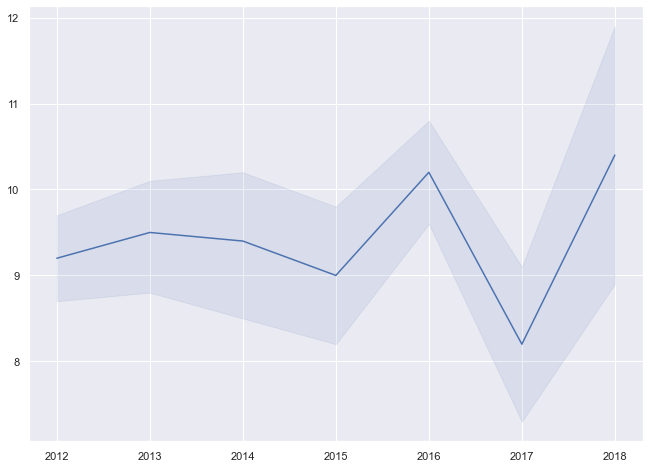

In [122]:
sns.set(rc={'figure.figsize':(11,8)})
fig, ax = plt.subplots(1, 1)
plt.plot(df_total["Year"], df_total['Percent'])
ax.fill_between(df_total["Year"], df_total["Upper 95% CL"], df_total["Lower 95% CL"], color='b', alpha=.1)
plt.show()

This plot shows the fluctation of Diabetes percetage through 2012 to 2018. We cannot summmarize a clear trend just by looking at this graph. However, if we extract the two ends, Year 2018 to Year 2012, a sharp increase is shown. 

In [162]:
#sex
df_sex = df.loc[df['Strata'] == 'Sex']

In [163]:
#age
df_age = df.loc[df['Strata'] == 'Age']

In [125]:
#race
df_race = df.loc[df['Strata'] == 'Race-Ethnicity']
#df_race.head(5)

In [126]:
#income
df_income = df.loc[df['Strata'] == 'Income']
#df_income.head(5)

In [127]:
#Education
df_edu = df.loc[df['Strata'] == 'Education']
#df_edu.head(5)

## Data Visualization

We plotted each indicator to see how their trend changed over different years and compared each indicator within their strata group to see which group of people pay more attention to avoiding diabetes in California. 

Text(0.5, 1.0, 'Gender')

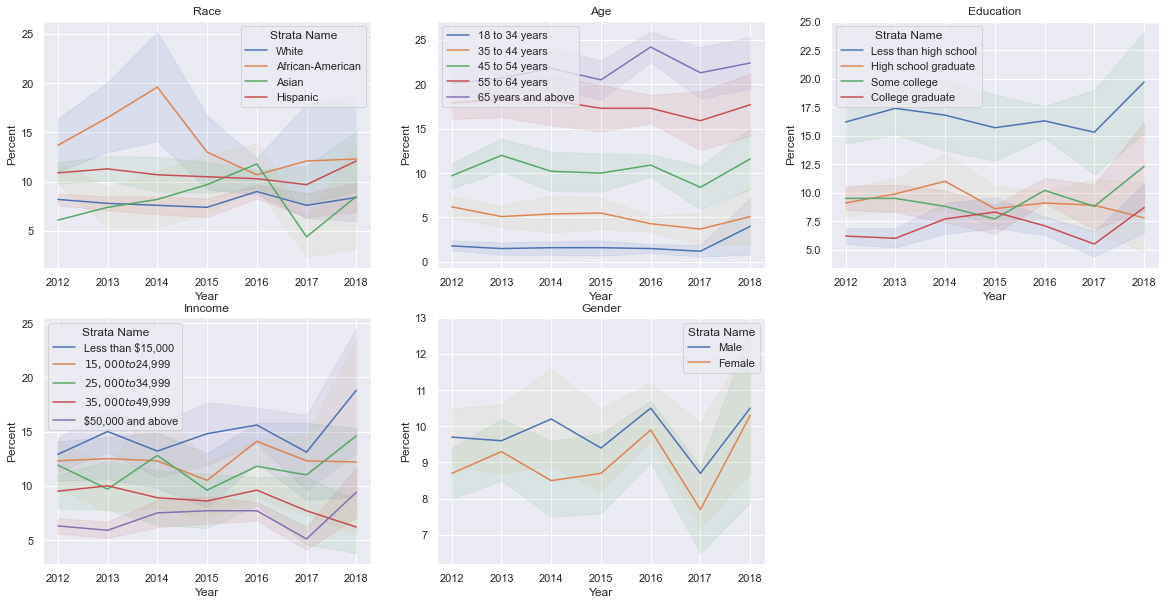

In [160]:
# Sub plot
#race
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
ax = sns.lineplot(x = "Year", y = "Percent", hue = "Strata Name", data = df_race)
ax.fill_between(df_race.loc[df['Strata Name'] == 'White']["Year"], df_race.loc[df['Strata Name'] == 'White']["Upper 95% CL"], df_race.loc[df['Strata Name'] == 'White']["Lower 95% CL"], color='r', alpha=.1)
ax.fill_between(df_race.loc[df['Strata Name'] == 'African-American']["Year"], df_race.loc[df['Strata Name'] == 'African-American']["Upper 95% CL"], df_race.loc[df['Strata Name'] == 'African-American']["Lower 95% CL"], color='b', alpha=.1)
ax.fill_between(df_race.loc[df['Strata Name'] == 'Asian']["Year"], df_race.loc[df['Strata Name'] == 'Asian']["Upper 95% CL"], df_race.loc[df['Strata Name'] == 'Asian']["Lower 95% CL"], color='y', alpha=.1)
ax.fill_between(df_race.loc[df['Strata Name'] == 'Hispanic']["Year"], df_race.loc[df['Strata Name'] == 'Hispanic']["Upper 95% CL"], df_race.loc[df['Strata Name'] == 'Hispanic']["Lower 95% CL"], color='g', alpha=.1)
ax.set_title("Race")

#age
plt.subplot(2,3,2)
ax = sns.lineplot(x = "Year", y = "Percent", hue = "Strata Name", data = df_age)
ax.fill_between(df_age.loc[df['Strata Name'] == '18 to 34 years']["Year"], df_age.loc[df['Strata Name'] == '18 to 34 years']["Upper 95% CL"], df_age.loc[df['Strata Name'] == '18 to 34 years']["Lower 95% CL"], color='b', alpha=.1)
ax.fill_between(df_age.loc[df['Strata Name'] == '35 to 44 years']["Year"], df_age.loc[df['Strata Name'] == '35 to 44 years']["Upper 95% CL"], df_age.loc[df['Strata Name'] == '35 to 44 years']["Lower 95% CL"], color='y', alpha=.1)
ax.fill_between(df_age.loc[df['Strata Name'] == '45 to 54 years']["Year"], df_age.loc[df['Strata Name'] == '45 to 54 years']["Upper 95% CL"], df_age.loc[df['Strata Name'] == '45 to 54 years']["Lower 95% CL"], color='g', alpha=.1)
ax.fill_between(df_age.loc[df['Strata Name'] == '55 to 64 years']["Year"], df_age.loc[df['Strata Name'] == '55 to 64 years']["Upper 95% CL"], df_age.loc[df['Strata Name'] == '55 to 64 years']["Lower 95% CL"], color='r', alpha=.1)
ax.fill_between(df_age.loc[df['Strata Name'] == '65 years and above']["Year"], df_age.loc[df['Strata Name'] == '65 years and above']["Upper 95% CL"], df_age.loc[df['Strata Name'] == '65 years and above']["Lower 95% CL"], color='m', alpha=.1)
ax.legend(loc = 2)
ax.set_title("Age")

#edu
plt.subplot(2,3,3)
ax = sns.lineplot(x = "Year", y = "Percent", hue = "Strata Name", data = df_edu)
ax.set(xlabel = "Year", ylabel = "Percent")
ax.fill_between(df_edu.loc[df['Strata Name'] == 'Less than high school']["Year"], df_edu.loc[df['Strata Name'] == 'Less than high school']["Upper 95% CL"], df_edu.loc[df['Strata Name'] == 'Less than high school']["Lower 95% CL"], color='g', alpha=.1)
ax.fill_between(df_edu.loc[df['Strata Name'] == 'High school graduate']["Year"], df_edu.loc[df['Strata Name'] == 'High school graduate']["Upper 95% CL"], df_edu.loc[df['Strata Name'] == 'High school graduate']["Lower 95% CL"], color='y', alpha=.1)
ax.fill_between(df_edu.loc[df['Strata Name'] == 'Some college']["Year"], df_edu.loc[df['Strata Name'] == 'Some college']["Upper 95% CL"], df_edu.loc[df['Strata Name'] == 'Some college']["Lower 95% CL"], color='r', alpha=.1)
ax.fill_between(df_edu.loc[df['Strata Name'] == 'College graduate']["Year"], df_edu.loc[df['Strata Name'] == 'College graduate']["Upper 95% CL"], df_edu.loc[df['Strata Name'] == 'College graduate']["Lower 95% CL"], color='b', alpha=.1)
ax.set_title("Education")

#Income Plot
plt.subplot(2,3,4)
ax = sns.lineplot(x = "Year", y = "Percent", hue = "Strata Name", data = df_income)
ax.fill_between(df_income.loc[df['Strata Name'] == 'Less than $15,000']["Year"], df_income.loc[df['Strata Name'] == 'Less than $15,000']["Upper 95% CL"], df_income.loc[df['Strata Name'] == 'Less than $15,000']["Lower 95% CL"], color='m', alpha=.1)
ax.fill_between(df_income.loc[df['Strata Name'] == '$15,000 to $24,999']["Year"], df_income.loc[df['Strata Name'] == '$15,000 to $24,999']["Upper 95% CL"], df_income.loc[df['Strata Name'] == '$15,000 to $24,999']["Lower 95% CL"], color='b', alpha=.1)
ax.fill_between(df_income.loc[df['Strata Name'] == '$25,000 to $34,999']["Year"], df_income.loc[df['Strata Name'] == '$25,000 to $34,999']["Upper 95% CL"], df_income.loc[df['Strata Name'] == '$25,000 to $34,999']["Lower 95% CL"], color='y', alpha=.1)
ax.fill_between(df_income.loc[df['Strata Name'] == '$35,000 to $49,999']["Year"], df_income.loc[df['Strata Name'] == '$35,000 to $49,999']["Upper 95% CL"], df_income.loc[df['Strata Name'] == '$35,000 to $49,999']["Lower 95% CL"], color='g', alpha=.1)
ax.fill_between(df_income.loc[df['Strata Name'] == '$50,000 and above']["Year"], df_income.loc[df['Strata Name'] == '$50,000 and above']["Upper 95% CL"], df_income.loc[df['Strata Name'] == '$50,000 and above']["Lower 95% CL"], color='r', alpha=.1)
ax.set_title("Inncome")

#sex plot
plt.subplot(2,3,5)
ax = sns.lineplot(x = "Year", y = "Percent", hue = "Strata Name", data = df_sex)
ax.set(xlabel = "Year", ylabel = "Percent")
ax.fill_between(df_sex.loc[df['Strata Name'] == 'Male']["Year"], df_sex.loc[df['Strata Name'] == 'Male']["Upper 95% CL"], df_sex.loc[df['Strata Name'] == 'Male']["Lower 95% CL"], color='y', alpha=.1)
ax.fill_between(df_sex.loc[df['Strata Name'] == 'Female']["Year"], df_sex.loc[df['Strata Name'] == 'Female']["Upper 95% CL"], df_sex.loc[df['Strata Name'] == 'Female']["Lower 95% CL"], color='g', alpha=.1)
ax.set_title("Gender")


The figures above start from the top left: Race, age, education level, income, and sex.

The plots above are the rates of diabetes in California since 2012. While the plots alone are unable to give us any real predictive power, we do see some rough trends in the data that lend us some clues on what parameters of interest to potentially include in our model. In the age plot, we see the older group has a higher diabetes percentage. In the education plot, we see the group with an education level less than high school has a distinct difference compared to other groups. In the income plot, we see the group with a higher wage has less percentage of diabetes. 

However, we do not want to make any conclusions just based on these plots since we did not perform any statistical test on this data. It only provides us with some ideas for the following parts. We know where to start our search for a good model and which factors to potentially look out for. 
